## Tensorflow Tutorial 2022

### What is a Tensor?

We need to represent our data numerically. Pink has no meaning as input, but .1 Red, .075 Green and .079 blue does if represented as [.1, .075, .079]

The following are all tensors:

* [.1, .075, .079] is called a vector
* [1] is a scalar
* Matrix is a multidimensional array
* Tensor is a multidimensional array of vectors

#### Imports

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# Multiple math functions
from tensorflow import math
from tensorflow.keras.utils import plot_model

#### Download Data

In [4]:
nba_data = pd.read_csv("https://raw.githubusercontent.com/derekbanas/tensorflow/main/nba_salary_stats.csv")
nba_data.head()

,first_name,last_name,team,salary,pos,age,g,gs,mp,fg,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Precious,Achiuwa,TOR,2711280.0,C,22,73,28,1725,265,...,0.595,146,327,473,82,37,41,84,151,664
1,Bam,Adebayo,MIA,28103550.0,C,24,56,56,1825,406,...,0.753,137,427,564,190,80,44,148,171,1068
2,LaMarcus,Aldridge,BRK,2641691.0,C,36,47,12,1050,252,...,0.873,73,185,258,42,14,47,44,78,607
3,Grayson,Allen,MIL,4054695.0,SG,26,66,61,1805,255,...,0.865,32,190,222,100,46,18,43,96,733
4,Jarrett,Allen,CLE,20000000.0,C,23,56,56,1809,369,...,0.708,192,410,602,92,44,75,94,97,904


#### Delete Unknown Values

In [5]:
nba_data.isna().sum()

first_name    0
last_name     0
team          0
salary        0
pos           0
age           0
g             0
gs            0
mp            0
fg            0
fga           0
fg%           0
3p            0
3pa           0
3p%           0
2p            0
2pa           0
2p%           0
efg%          0
ft            0
fta           0
ft%           0
orb           0
drb           0
trb           0
ast           0
stl           0
blk           0
tov           0
pf            0
pts           0
dtype: int64

#### Delete Unneeded Data

In [15]:
nba_data_numeric = nba_data.copy()
del nba_data_numeric['first_name']
del nba_data_numeric['last_name']
del nba_data_numeric['team']
del nba_data_numeric['pos']

In [16]:
nba_data_numeric

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2711280.0,22,73,28,1725,265,603,0.439,56,156,...,0.595,146,327,473,82,37,41,84,151,664
1,28103550.0,24,56,56,1825,406,729,0.557,0,6,...,0.753,137,427,564,190,80,44,148,171,1068
2,2641691.0,36,47,12,1050,252,458,0.550,14,46,...,0.873,73,185,258,42,14,47,44,78,607
3,4054695.0,26,66,61,1805,255,569,0.448,159,389,...,0.865,32,190,222,100,46,18,43,96,733
4,20000000.0,23,56,56,1809,369,545,0.677,1,10,...,0.708,192,410,602,92,44,75,94,97,904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2239200.0,25,50,0,459,37,98,0.378,21,70,...,0.833,21,68,89,34,14,3,16,47,110
285,13666667.0,26,68,67,2094,440,878,0.501,131,336,...,0.623,110,576,686,155,54,65,126,171,1218
286,8526316.0,29,77,8,1452,122,269,0.454,44,116,...,0.857,50,170,220,188,93,19,45,56,342
287,1489065.0,23,56,12,706,130,247,0.526,1,11,...,0.623,85,209,294,49,17,20,41,84,299


#### Convert Currency to Float

In [17]:
def clean_currency(x):
    if isinstance(x, str):
        return x.replace('$', '').replace(',', '')
    return x

In [18]:
nba_data_numeric['salary'] = nba_data_numeric['salary'].apply(clean_currency).astype(float)
nba_data_numeric

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2711280.0,22,73,28,1725,265,603,0.439,56,156,...,0.595,146,327,473,82,37,41,84,151,664
1,28103550.0,24,56,56,1825,406,729,0.557,0,6,...,0.753,137,427,564,190,80,44,148,171,1068
2,2641691.0,36,47,12,1050,252,458,0.550,14,46,...,0.873,73,185,258,42,14,47,44,78,607
3,4054695.0,26,66,61,1805,255,569,0.448,159,389,...,0.865,32,190,222,100,46,18,43,96,733
4,20000000.0,23,56,56,1809,369,545,0.677,1,10,...,0.708,192,410,602,92,44,75,94,97,904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2239200.0,25,50,0,459,37,98,0.378,21,70,...,0.833,21,68,89,34,14,3,16,47,110
285,13666667.0,26,68,67,2094,440,878,0.501,131,336,...,0.623,110,576,686,155,54,65,126,171,1218
286,8526316.0,29,77,8,1452,122,269,0.454,44,116,...,0.857,50,170,220,188,93,19,45,56,342
287,1489065.0,23,56,12,706,130,247,0.526,1,11,...,0.623,85,209,294,49,17,20,41,84,299


In [19]:
nba_data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   salary  289 non-null    float64
 1   age     289 non-null    int64  
 2   g       289 non-null    int64  
 3   gs      289 non-null    int64  
 4   mp      289 non-null    int64  
 5   fg      289 non-null    int64  
 6   fga     289 non-null    int64  
 7   fg%     289 non-null    float64
 8   3p      289 non-null    int64  
 9   3pa     289 non-null    int64  
 10  3p%     289 non-null    float64
 11  2p      289 non-null    int64  
 12  2pa     289 non-null    int64  
 13  2p%     289 non-null    float64
 14  efg%    289 non-null    float64
 15  ft      289 non-null    int64  
 16  fta     289 non-null    int64  
 17  ft%     289 non-null    float64
 18  orb     289 non-null    int64  
 19  drb     289 non-null    int64  
 20  trb     289 non-null    int64  
 21  ast     289 non-null    int64  
 22  st

In [20]:
print(np.shape(nba_data_numeric))

(289, 27)


In [21]:
print(nba_data_numeric.describe())

             salary         age           g          gs           mp  \
count  2.890000e+02  289.000000  289.000000  289.000000   289.000000   
mean   8.972877e+06   25.768166   56.619377   30.415225  1373.657439   
std    1.008679e+07    4.378557   18.081042   26.947104   698.833132   
min    5.318000e+03   19.000000    9.000000    0.000000    35.000000   
25%    2.033160e+06   22.000000   47.000000    5.000000   799.000000   
50%    4.259259e+06   25.000000   62.000000   21.000000  1406.000000   
75%    1.242000e+07   29.000000   70.000000   57.000000  1931.000000   
max    4.578097e+07   38.000000   82.000000   80.000000  2743.000000   

               fg          fga         fg%          3p         3pa  ...  \
count  289.000000   289.000000  289.000000  289.000000  289.000000  ...   
mean   237.546713   514.283737    0.458730   74.276817  208.335640  ...   
std    164.543135   347.674340    0.072096   63.139612  166.382283  ...   
min      3.000000    13.000000    0.231000    0.000

#### Box Plots

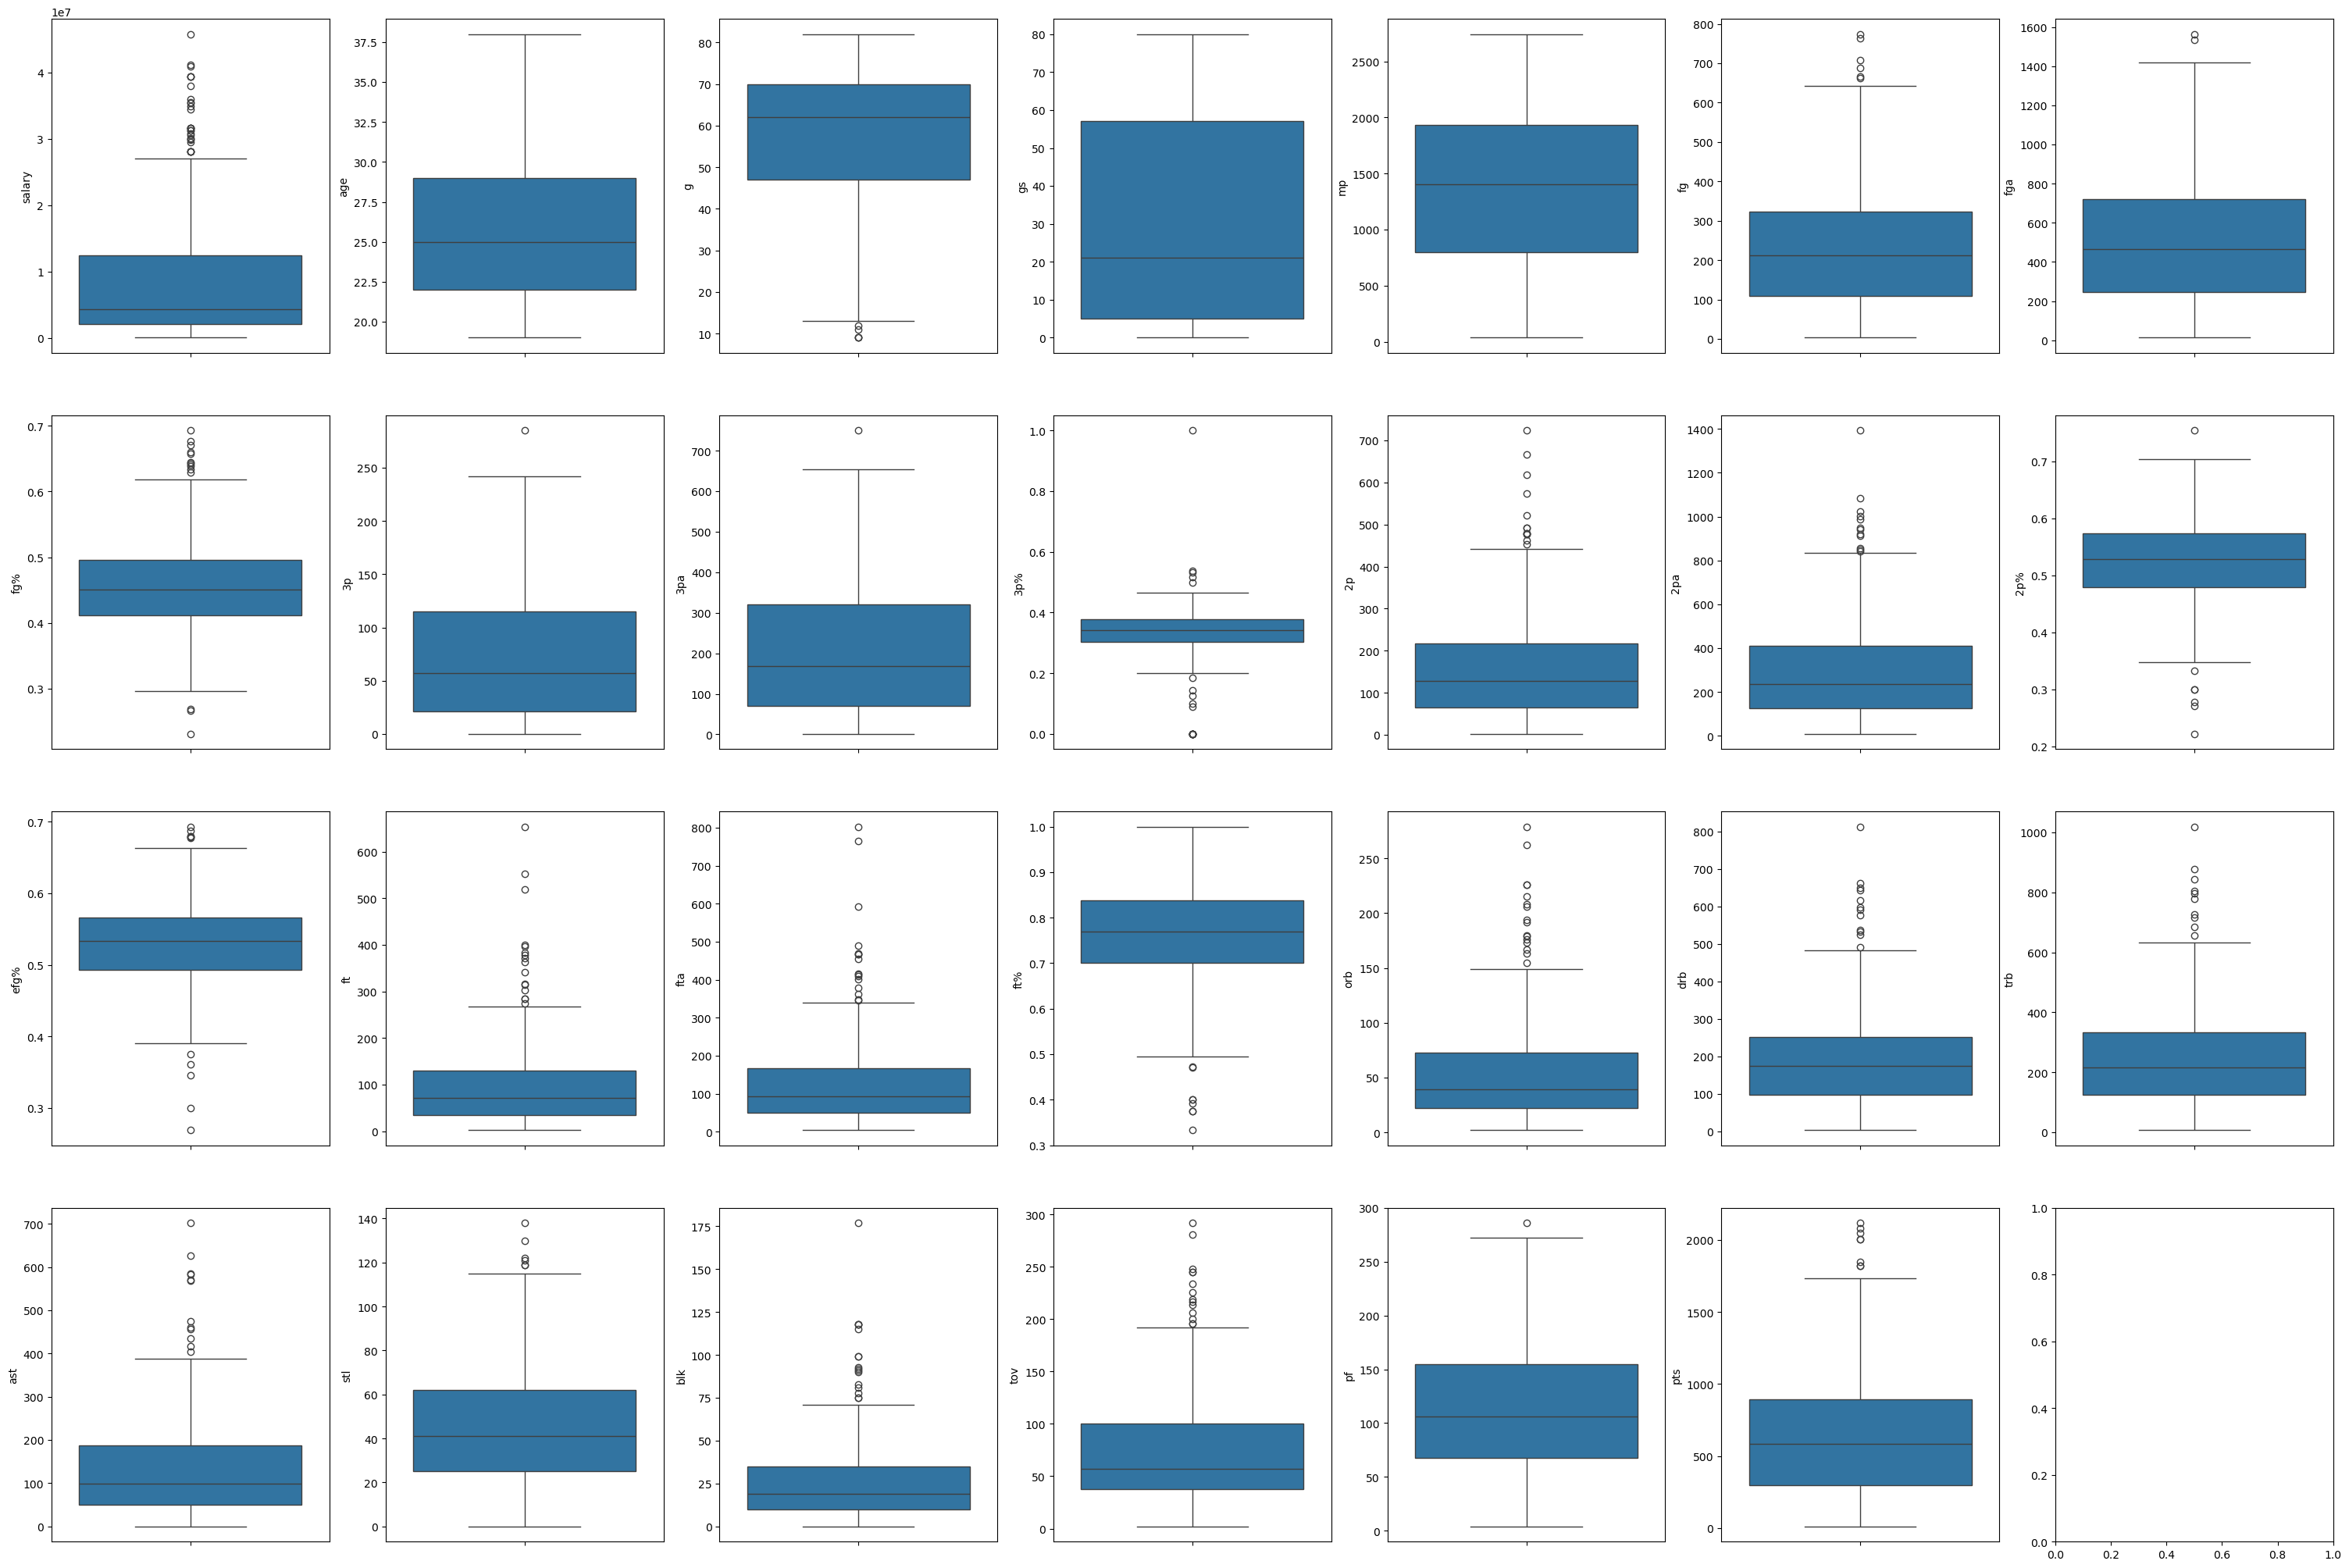

In [22]:
fig, axs = plt.subplots(ncols=7, nrows=4, figsize=(30, 20))
index = 0
axs = axs.flatten()
for k, v in nba_data_numeric.items():
    sns.boxplot(y=k, data=nba_data_numeric, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

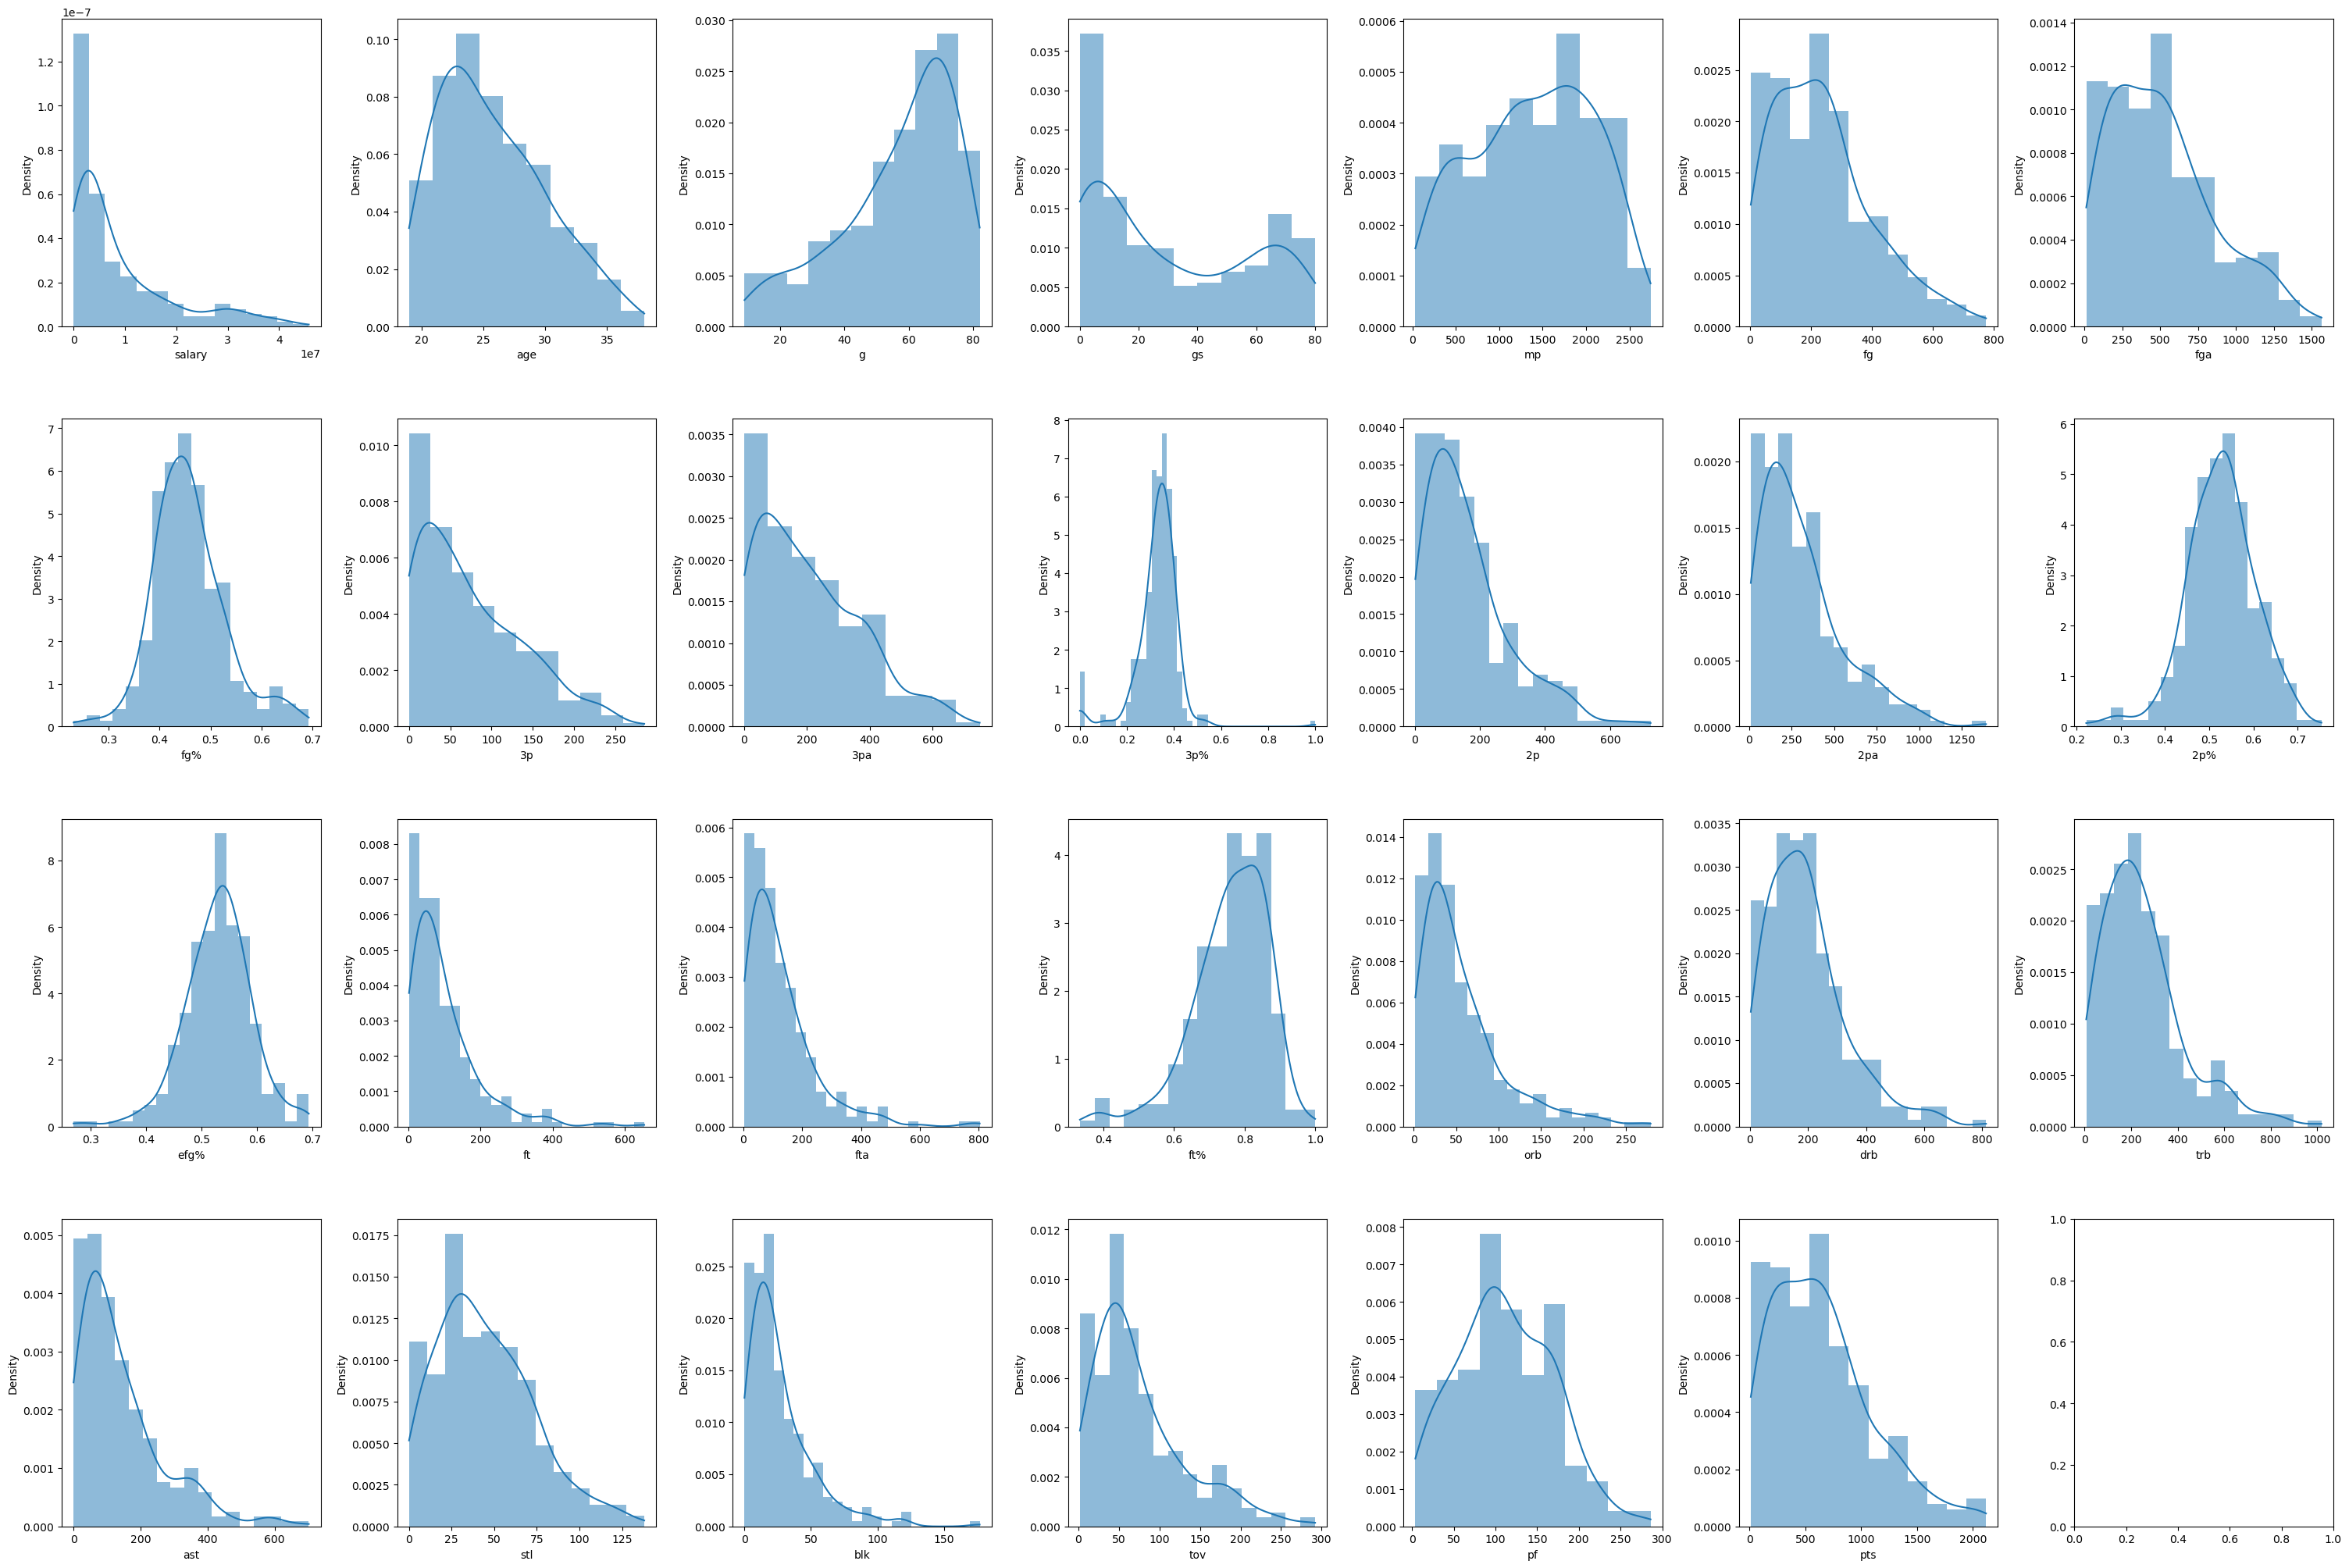

In [23]:
fig, axs = plt.subplots(ncols=7, nrows=4, figsize=(30,20))
index = 0
axs = axs.flatten()
for k, v in nba_data_numeric.items():
    sns.histplot(v, ax=axs[index], kde=True, stat="density", linewidth=0)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

#### Correlation Matrix

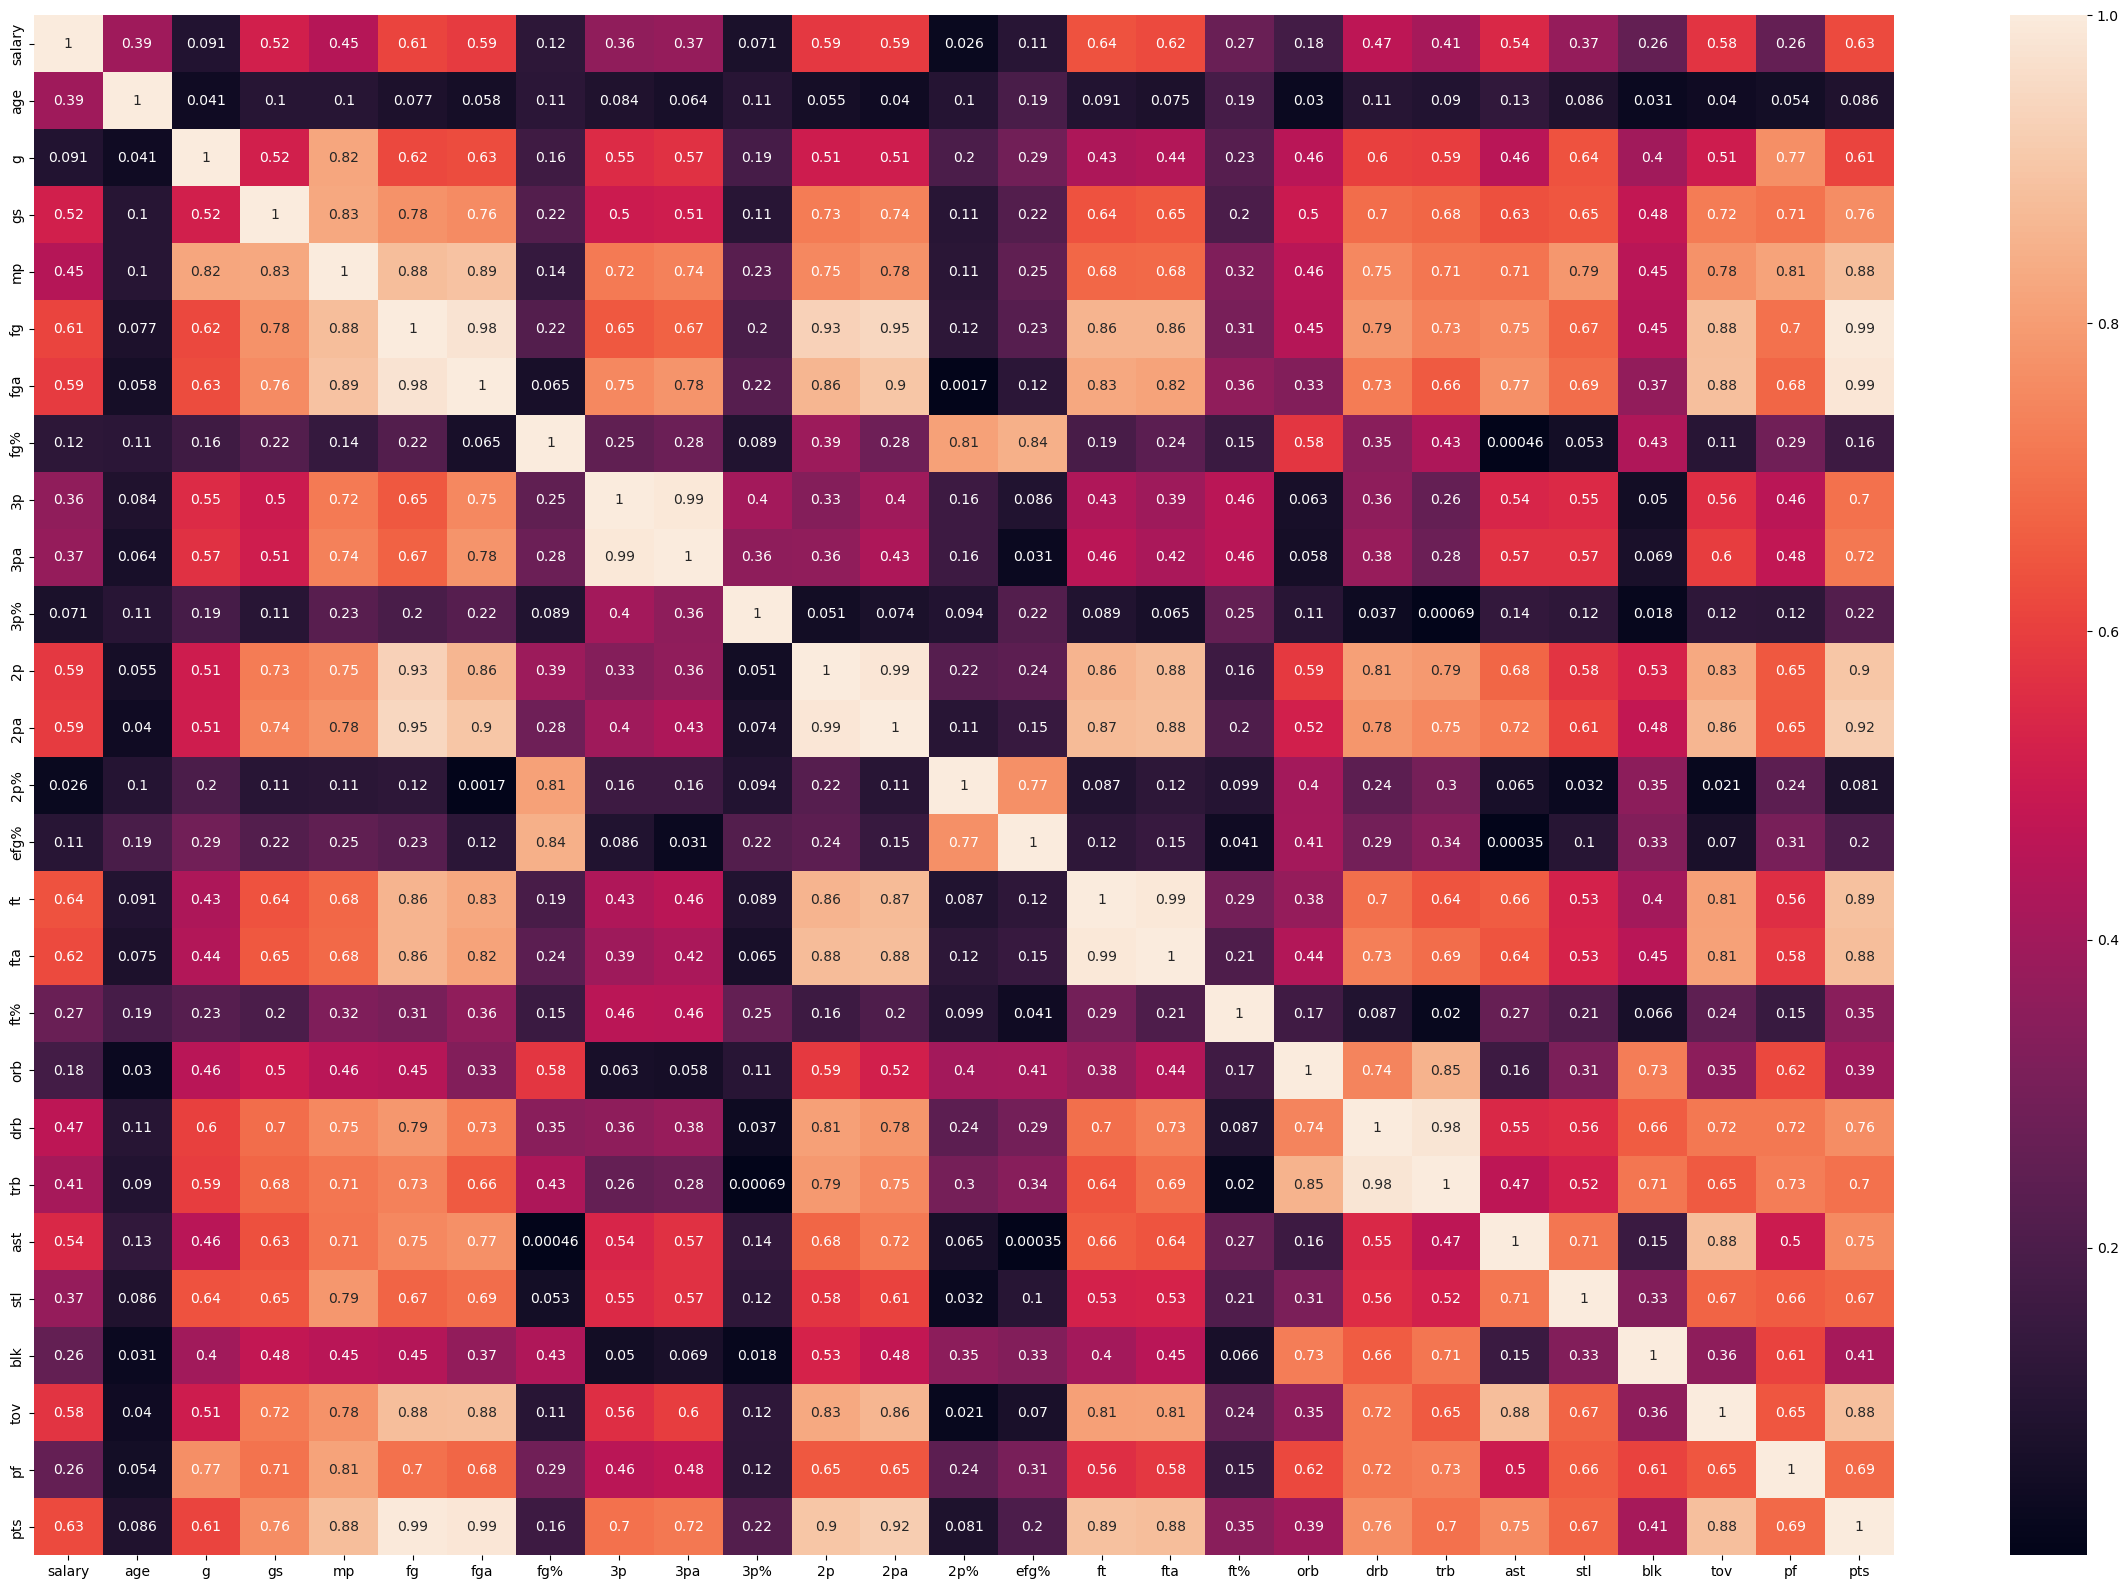

In [24]:
plt.figure(figsize=(30, 20))
sns.heatmap(nba_data_numeric.corr().abs(), annot=True)
plt.show()

#### Get Percentage of Outliers

In [27]:
for k, v in nba_data_numeric.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    v_col = v[(v <= q1 - 1.5*iqr) | (v >= q3 + 1.5*iqr)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(nba_data_numeric)[0]
    print("%s Outliers = %.2f%%" % (k, perc))

salary Outliers = 9.69%
age Outliers = 0.00%
g Outliers = 1.73%
gs Outliers = 0.00%
mp Outliers = 0.00%
fg Outliers = 2.08%
fga Outliers = 0.69%
fg% Outliers = 4.84%
3p Outliers = 0.35%
3pa Outliers = 0.35%
3p% Outliers = 6.57%
2p Outliers = 4.50%
2pa Outliers = 4.15%
2p% Outliers = 2.42%
efg% Outliers = 3.81%
ft Outliers = 5.54%
fta Outliers = 5.54%
ft% Outliers = 2.77%
orb Outliers = 5.54%
drb Outliers = 4.15%
trb Outliers = 3.46%
ast Outliers = 4.15%
stl Outliers = 2.08%
blk Outliers = 5.54%
tov Outliers = 4.84%
pf Outliers = 0.35%
pts Outliers = 2.77%


#### Tensorflow Neural Network Regressions

#### Tensors

##### Create Constant Tensor

In [28]:
scalar = tf.constant(5)
scalar

2024-10-24 15:04:43.804117: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-10-24 15:04:43.829979: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-24 15:04:43.835678: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


<tf.Tensor: shape=(), dtype=int32, numpy=5>

##### Create a vector

In [29]:
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

##### Create a Matrix

In [30]:
matrix = tf.constant([[1, 2], [3, 4]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

##### Create a Tensor

In [32]:
tensor = tf.constant([[[1, 2, 3], 
                       [4, 5, 6]],
                       [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                      [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

##### Create Tensor that can be changed

In [33]:
v_tensor = tf.Variable([5, 6])
v_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([5, 6], dtype=int32)>

##### Get and Change Values

In [34]:
print("Index 0:", v_tensor[0])
v_tensor[0].assign(8)
print("Index 0:", v_tensor[0])

Index 0: tf.Tensor(5, shape=(), dtype=int32)
Index 0: tf.Tensor(8, shape=(), dtype=int32)


##### Random Tensors

In [35]:
rand_tensor = tf.random.Generator.from_seed(66)
rand_tensor = rand_tensor.normal(shape=(3, 2), mean=0.0, stddev=1.0)
rand_tensor

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 0.5517507 , -0.3741098 ],
       [-0.28709963,  1.5089895 ],
       [-0.14833727, -1.2846565 ]], dtype=float32)>

##### Turn Numpy Array into Tensor

In [36]:
np_array = np.arange(1, 25, dtype=np.int32)
np_array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [37]:
tensor2 = tf.constant(np_array)
tensor2

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)>

##### Change Shape of Tensors

In [38]:
tensor3 = tf.constant(np_array, shape=(6, 2, 2))
tensor3

<tf.Tensor: shape=(6, 2, 2), dtype=int32, numpy=
array([[[ 1,  2],
        [ 3,  4]],

       [[ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12]],

       [[13, 14],
        [15, 16]],

       [[17, 18],
        [19, 20]],

       [[21, 22],
        [23, 24]]], dtype=int32)>

##### Get Info on Tensors

In [44]:
print("Index 0 :", tensor3[:1])
print("Values in Dims :", tensor3.shape)
print("Dimensions :", tensor3.ndim)
print("Total Values :", tf.size(tensor3).numpy())
print("Data Type :", tensor3.dtype)

Index 0 : tf.Tensor(
[[[1 2]
  [3 4]]], shape=(1, 2, 2), dtype=int32)
Values in Dims : (6, 2, 2)
Dimensions : 3
Total Values : 24
Data Type : <dtype: 'int32'>


#### Matrix Multiplication

DOT PRODUCT: Matrix Multiplication

Multiply Matching Numbers and sum them. Take each row in the left matrix, multiply it by the columns in the right matrix and sum 

* Multiply and sum 1st row and 1st column (Position 0, 0)
* 1st row and 2nd column (Position 0, 1)
* 2nd row and first column (Position 1, 0)
* 2nd row and 2nd column (Position 1, 1)

The dimension of the resulting matrix will be the number of rows from 1st (2x3) and the number of columns from the 2nd (3x2) matrix.
You can only perform this calculation if the 1st matrix has an equal number of columns to the number of rows in the 2nd.

#### Why is Matrix Multiplication useful

In [45]:
ic_sales = tf.constant([[26, 27, 22, 10, 12, 33],
                       [18, 21, 10, 8, 4, 26],
                       [9, 20, 4, 9, 7, 16],
                       [24, 19, 12, 8, 6, 14]])
ic_sales # ice cream sales

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[26, 27, 22, 10, 12, 33],
       [18, 21, 10,  8,  4, 26],
       [ 9, 20,  4,  9,  7, 16],
       [24, 19, 12,  8,  6, 14]], dtype=int32)>

In [46]:
ic_price = tf.constant([[3,2,4,4]])
ic_price

<tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[3, 2, 4, 4]], dtype=int32)>

In [47]:
tf.matmul(ic_price, ic_sales)

<tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[246, 279, 150, 114,  96, 271]], dtype=int32)>

#### Normalize and One Hot Encode Our Data

In [48]:
nba_data_numeric

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2711280.0,22,73,28,1725,265,603,0.439,56,156,...,0.595,146,327,473,82,37,41,84,151,664
1,28103550.0,24,56,56,1825,406,729,0.557,0,6,...,0.753,137,427,564,190,80,44,148,171,1068
2,2641691.0,36,47,12,1050,252,458,0.550,14,46,...,0.873,73,185,258,42,14,47,44,78,607
3,4054695.0,26,66,61,1805,255,569,0.448,159,389,...,0.865,32,190,222,100,46,18,43,96,733
4,20000000.0,23,56,56,1809,369,545,0.677,1,10,...,0.708,192,410,602,92,44,75,94,97,904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2239200.0,25,50,0,459,37,98,0.378,21,70,...,0.833,21,68,89,34,14,3,16,47,110
285,13666667.0,26,68,67,2094,440,878,0.501,131,336,...,0.623,110,576,686,155,54,65,126,171,1218
286,8526316.0,29,77,8,1452,122,269,0.454,44,116,...,0.857,50,170,220,188,93,19,45,56,342
287,1489065.0,23,56,12,706,130,247,0.526,1,11,...,0.623,85,209,294,49,17,20,41,84,299


#### Normalize and One Hot Encode Our Data

In [71]:
nba_data_numeric.columns

Index(['salary', 'age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg%', '3p', '3pa',
       '3p%', '2p', '2pa', '2p%', 'efg%', 'ft', 'fta', 'ft%', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

In [72]:
# ct = make_column_transformer(
#     (MinMaxScaler(), ["age", "pts"]),
#     (OneHotEncoder(handle_unknown="ignore"), ["pos", "team"])
# )

# NBA Efficiency 
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg%', '3p', '3pa',
       '3p%', '2p', '2pa', '2p%', 'efg%', 'ft', 'fta', 'ft%', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts'])
)

#### Separate Features and Labels

In [73]:
X = nba_data.drop("salary", axis=1) # Features  (NBA Stats)
y = nba_data["salary"] # Label (Player Salary)

#### Separate Training and Testing Data

In [74]:
# Train 80% and Test 20% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

#### Transform Training and Test Data

In [75]:
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

#### Our New Normalized and One Hot Encoded Data

In [76]:
X_train_normal

array([[0.22222222, 0.02739726, 0.1375    , ..., 0.1       , 0.07446809,
        0.07787274],
       [0.44444444, 0.8630137 , 0.9       , ..., 0.83793103, 0.71276596,
        0.68138651],
       [0.5       , 0.42465753, 0.5       , ..., 0.45862069, 0.32269504,
        0.43494777],
       ...,
       [0.44444444, 0.89041096, 0.9125    , ..., 0.14482759, 0.57446809,
        0.38366572],
       [0.11111111, 0.82191781, 0.05      , ..., 0.28965517, 0.52836879,
        0.32573599],
       [0.38888889, 0.68493151, 0.175     , ..., 0.14827586, 0.20212766,
        0.15337132]])

#### Build Neural Network with Training Data

In [77]:
tf.random.set_seed(66)

nba_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

nba_model.compile(loss=tf.keras.losses.mae, 
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
                 metrics=["mae"])

fit_data = nba_model.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
8/8 [==============================] - 1s 3ms/step - loss: 8467057.3333 - mae: 8467057.3333
Epoch 2/200
8/8 [==============================] - 0s 2ms/step - loss: 9622531.8889 - mae: 9622531.8889
Epoch 3/200
8/8 [==============================] - 0s 3ms/step - loss: 9218354.3333 - mae: 9218354.3333
Epoch 4/200
8/8 [==============================] - 0s 3ms/step - loss: 9079013.2222 - mae: 9079013.2222
Epoch 5/200
8/8 [==============================] - 0s 2ms/step - loss: 8270252.6111 - mae: 8270252.6111
Epoch 6/200
8/8 [==============================] - 0s 3ms/step - loss: 9436719.4444 - mae: 9436719.4444
Epoch 7/200
8/8 [==============================] - 0s 4ms/step - loss: 9026372.3333 - mae: 9026372.3333
Epoch 8/200
8/8 [==============================] - 0s 2ms/step - loss: 8716226.0000 - mae: 8716226.0000
Epoch 9/200
8/8 [==============================] - 0s 3ms/step - loss: 8084944.4444 - mae: 8084944.4444
Epoch 10/200
8/8 [==============================] - 0s 3ms/step 

In [78]:
nba_model_loss, nba_model_mae = nba_model.evaluate(X_test_normal, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 3629844.5000 - mae: 3629844.5000


#### Plot to see How Increasing Epochs Decreases Loss

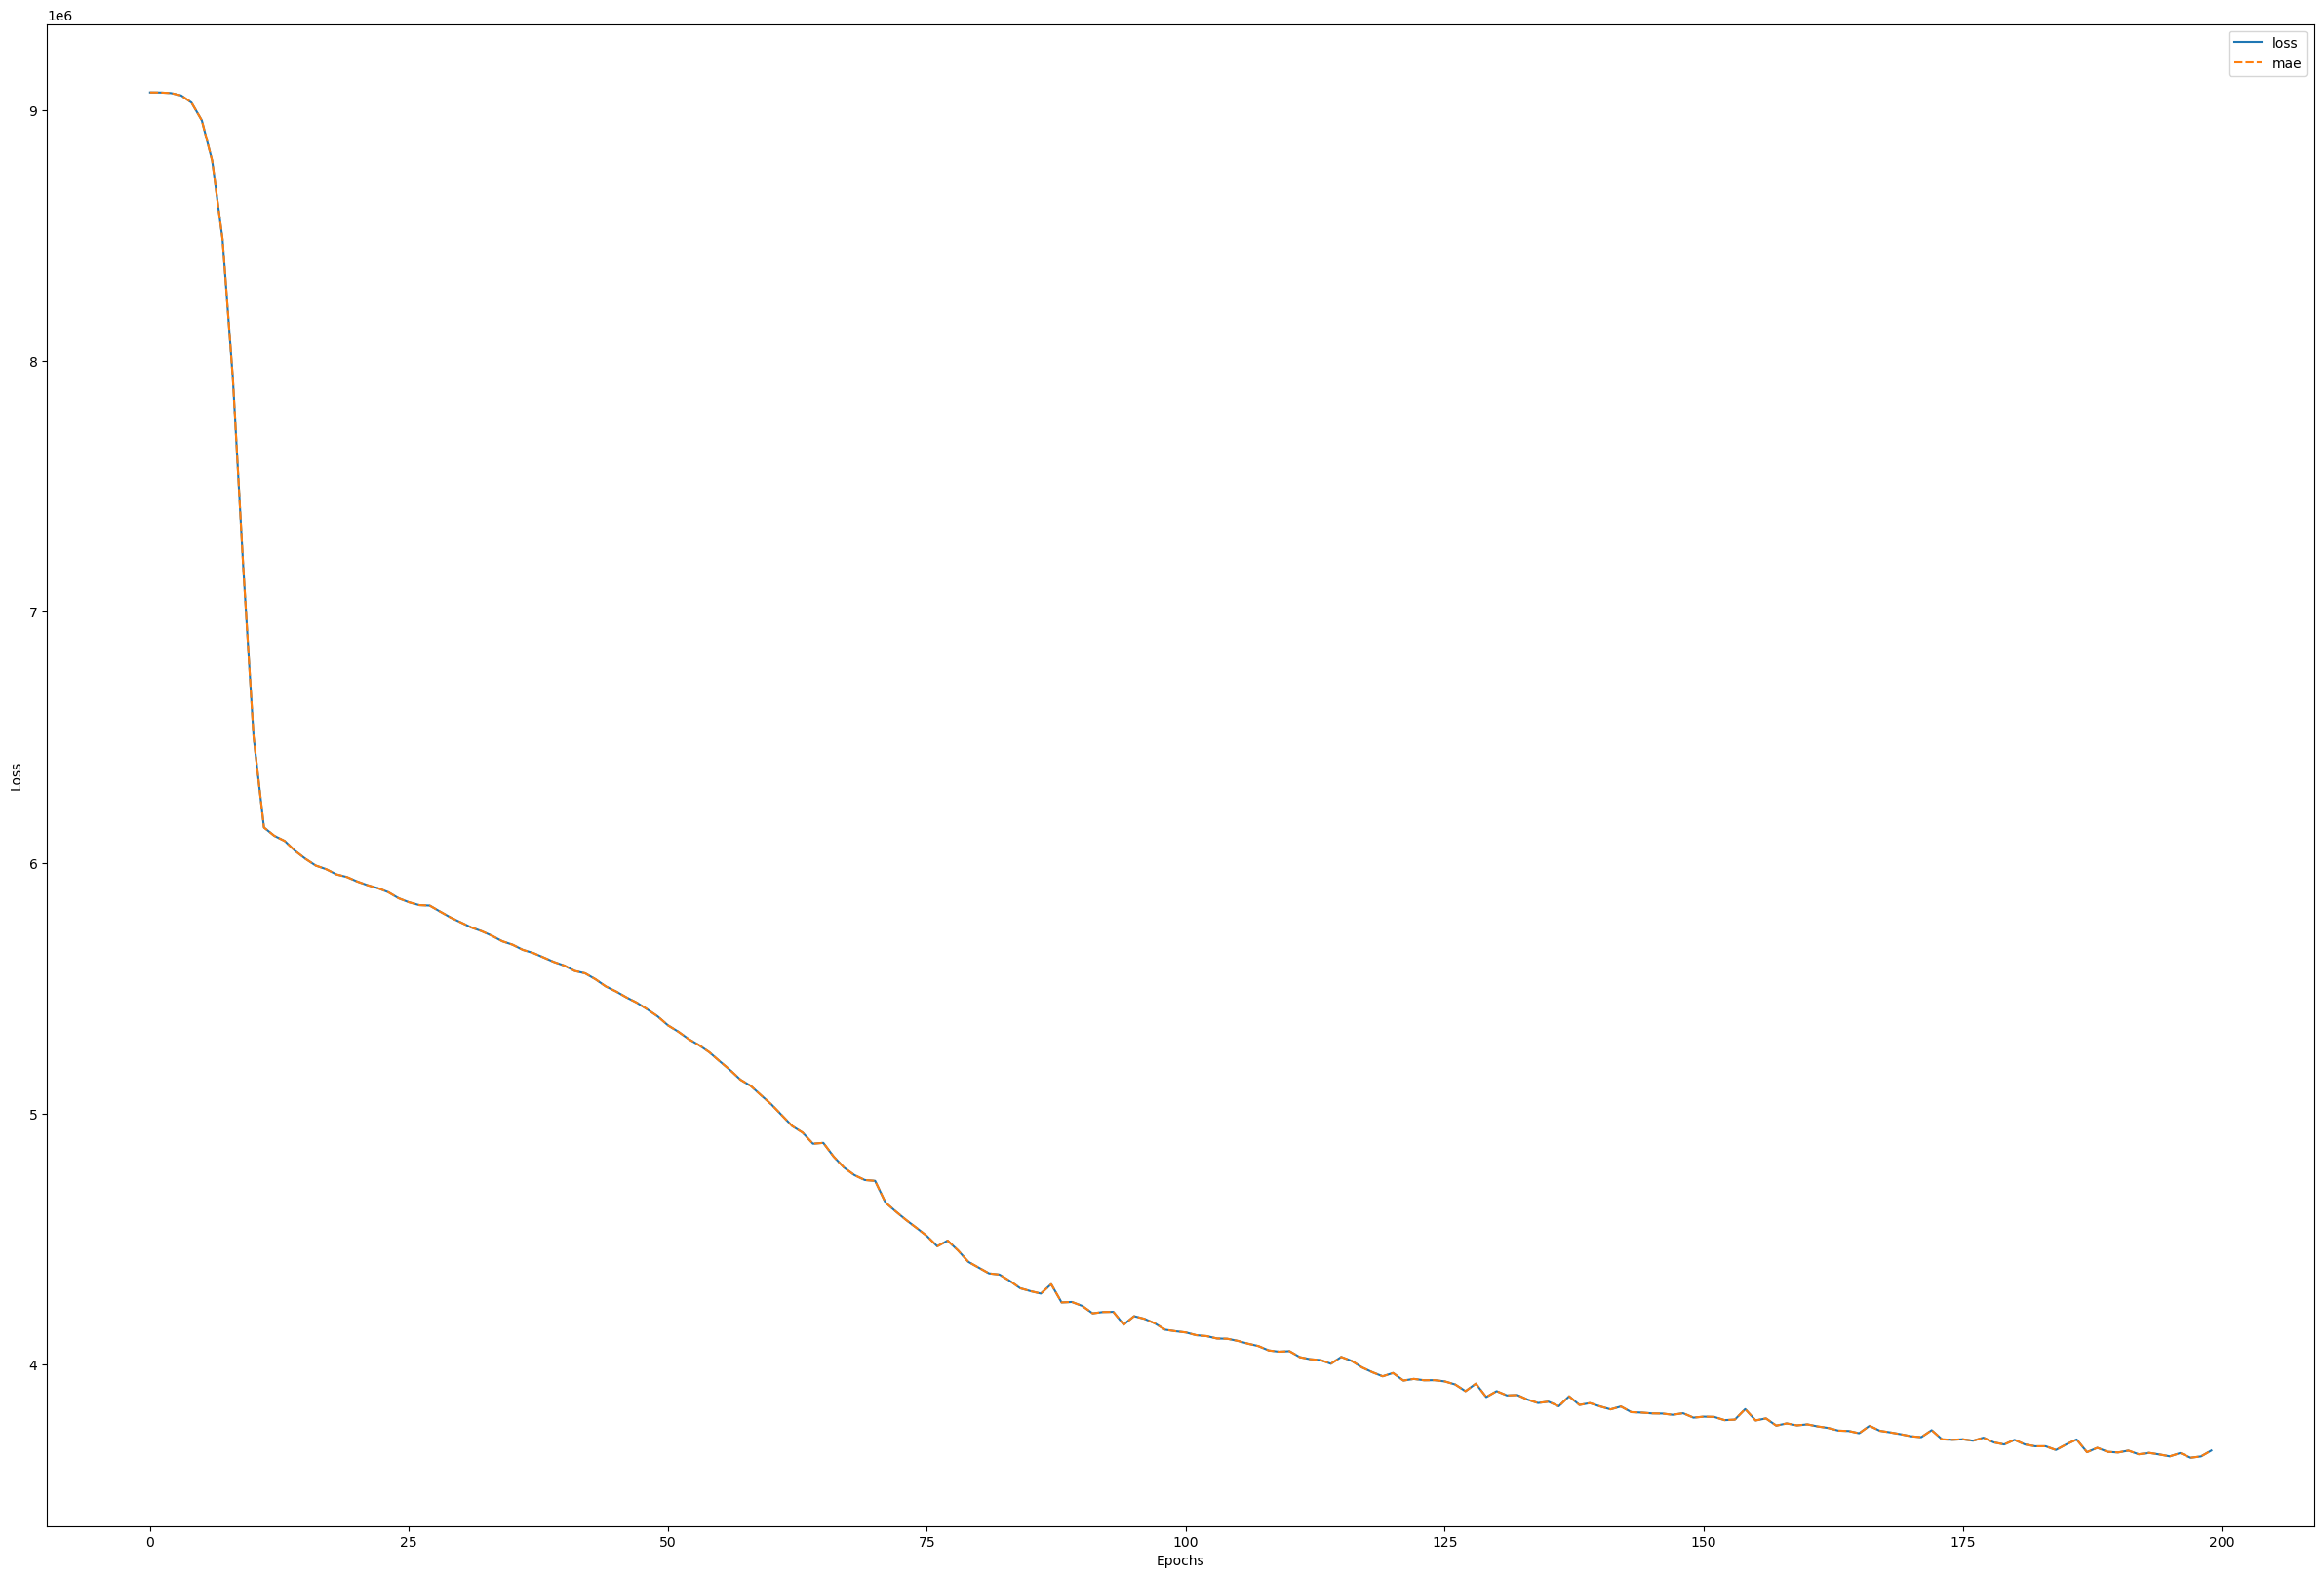

In [79]:
plt.figure(figsize=(30, 20))
plt.ylabel("Loss")
plt.xlabel("Epochs")
sns.lineplot(data=fit_data.history)
plt.show()